In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from collections import Counter

In [69]:
def confidence_score(prob_lst):
    # Calculate the difference between the max and second max of each list using list comprehension
    differences = [max(lst) - sorted(lst)[-2] for lst in prob_lst]

    # Sum up the differences
    total_difference_sum = sum(differences)
    print(total_difference_sum)
    print(len(prob_lst))
    print("Sum of differences between max and second max probabilities:", total_difference_sum/len(prob_lst))

In [70]:
def count_predictions_per_image(unique_image):
    majority_correct = 0
    minority_correct = 0
    wrong = 0
    majority_id_lst = []

    # Iterating over each group
    for image_id, group in unique_image:
        #print(image_id)
        
        labels = group['Label'].tolist()
        predictions = group['Predicted Label'].tolist()

        label_counts = Counter(labels)

        majority_label_count = max(label_counts.values(), default=0)

        unique_labels = set(labels)
        
        if majority_label_count > 1:  # If there is a majority label
            majority_label = label_counts.most_common(1)[0][0] # get the majority label
            if predictions == [majority_label] * len(predictions): # compare it with the predictions
                majority_correct += 1
                majority_id_lst.append(image_id)
            # calculate the minority
            elif all(pred in unique_labels for pred in predictions):# if the predicted labels equal one of the generated label
                minority_correct += 1
            else:
                wrong += 1

        elif all(pred in unique_labels for pred in predictions):# the case of no agreement and no majority
            minority_correct += 1
            
        else:
            wrong += 1

    return majority_correct, minority_correct, wrong, majority_id_lst

In [71]:

train_accuracies = []
validation_accuracies = []

train = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/baseline_model/train_probabilities/train_accuracies.csv')
val = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/baseline_model/validation_probabilities/val_accuracies.csv')

In [72]:
test_accuracies = []
test = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/baseline_model/test_probabilities/test_accuracies.csv')
for i in range(len(test)):
    accuracy = test.loc[i, 'Accuracy']
    test_accuracies.append(accuracy)
print(test_accuracies)

[0.5139027777777778]


In [73]:
train_prediction = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/baseline_model/train_probabilities/train_predictions.csv')
train_prediction = train_prediction.tail(168000).reset_index(drop=True) #No Overlap Split
train_prediction.head()

,instance_id,Predicted Label,probability
0,148116,1,"[0.005905927158892155, 0.12258656322956085, 2...."
1,136873,8,"[0.009684980846941471, 0.0001463253138354048, ..."
2,217791,0,"[0.8531491756439209, 7.132341295346123e-08, 0...."
3,107308,8,"[1.6961133951554075e-05, 0.0001561821554787457..."
4,160434,8,"[0.0065580145455896854, 0.9016011357307434, 0...."


In [74]:
len(train_prediction['instance_id'].unique())

168000

In [75]:
val_prediction = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/baseline_model/validation_probabilities/val_predictions.csv')
val_prediction = val_prediction.tail(36000).reset_index(drop=True) #No Overlap Split
val_prediction.head()

,instance_id,Predicted Label,probability
0,36839,6,"[0.04038125276565552, 0.005306887440383434, 0...."
1,216913,6,"[0.0002572374069131911, 0.00014586665201932192..."
2,69325,4,"[0.07687560468912125, 3.544288802004303e-06, 0..."
3,47674,4,"[0.006881892215460539, 0.0003702491521835327, ..."
4,123140,6,"[0.2376735806465149, 0.02790164202451706, 0.02..."


In [76]:
test_prediction = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/baseline_model/test_probabilities/test_predictions.csv')
len(test_prediction)

36000

In [77]:
for i in range(len(train)):
    accuracy = train.loc[i, 'Accuracy']
    train_accuracies.append(accuracy)

for i in range(len(val)):
    accuracy = val.loc[i, 'Accuracy']
    validation_accuracies.append(accuracy)

In [78]:
print(train_accuracies)
print(validation_accuracies)

[0.5797797619047619, 0.6027023809523809, 0.6090178571428572, 0.6102380952380952, 0.6107202380952381, 0.6106488095238095, 0.6096369047619048, 0.6081011904761905, 0.6069940476190476, 0.6056666666666667, 0.60425, 0.6038095238095238, 0.6028214285714286, 0.6018035714285714, 0.6019821428571429, 0.5997559523809524, 0.6012380952380952, 0.5997857142857143, 0.5987619047619047, 0.5985952380952381, 0.5986904761904762, 0.5981964285714285, 0.5979642857142857, 0.5970119047619048, 0.5967261904761905, 0.59625, 0.5959880952380953, 0.5947559523809524, 0.5960773809523809, 0.5952678571428571, 0.5953035714285714, 0.5948035714285714, 0.5957559523809524, 0.5953095238095238, 0.5941071428571428, 0.5936071428571429, 0.5932857142857143, 0.5938928571428571, 0.5931607142857143, 0.5936190476190476, 0.5927916666666667, 0.5934404761904762, 0.5919761904761904, 0.5922857142857143, 0.5927678571428572, 0.5922142857142857, 0.592047619047619, 0.5916607142857143, 0.5928869047619048, 0.5909702380952381]
[0.5988888888888889, 0

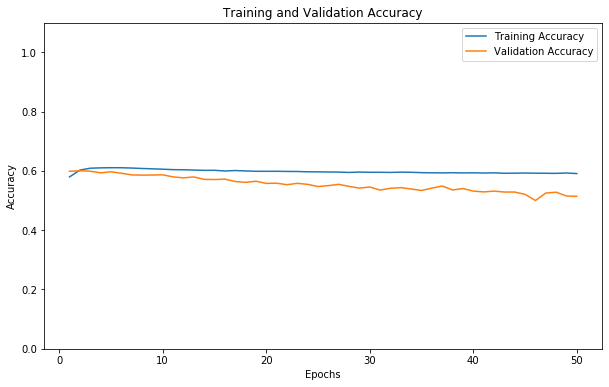

In [79]:
# Create a list of epochs for the x-axis (e.g., [1, 2, 3, 4, 5])
epochs = list(range(1, len(train_accuracies) + 1))

# Plot the training and validation accuracies
plt.figure(figsize=(10, 6))
plt.ylim([0.0, 1.1])
plt.plot(epochs, train_accuracies,  label='Training Accuracy')
plt.plot(epochs, validation_accuracies,  label='Validation Accuracy')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [80]:
# Define cost matrix (10x10)
cost_matrix1 = np.array([[0,0.25,0.09,0.09,0.17,0.09,0.05,0.13,0.02,0.09],
                        [0.08,0,0.2,0.06,0.04,0.2,0.24,0.02,0.1,0.06],
                        [0.05,0.34,0,0.03,0.17,0.09,0.05,0.14,0.03,0.09],
                        [0.11,0.23,0.08,0,0.15,0.08,0.11,0.1,0.06,0.08],
                        [0.12,0.09,0.23,0.09,0,0.09,0.12,0.14,0.07,0.02],
                        [0.06,0.43,0.11,0.04,0.09,0,0.02,0.17,0.03,0.04],
                        [0.03,0.47,0.06,0.06,0.1,0.02,0,0.19,0.01,0.06],
                        [0.08,0.04,0.16,0.06,0.12,0.16,0.21,0,0.11,0.06],
                        [0.03,0.38,0.06,0.06,0.12,0.06,0.03,0.2,0,0.06],
                        [0.1,0.23,0.2,0.08,0.04,0.08,0.11,0.1,0.06,0]])

In [81]:
# Define cost matrix (10x10)
cost_matrix = np.array([[0,2.0,0.75,0.75,1.33,0.75,0.4,1.0,0.17,0.75],
                        [2.0,0,5.0,1.5,1.0,5.0,6.0,0.5,2.5,1.5],
                        [0.75,5.0,0,0.5,2.5,1.33,0.75,2.0,0.4,1.33],
                        [0.75,1.5,0.5,0,1.0,0.5,0.75,0.67,0.4,0.5],
                        [1.33,1.0,2.5,1.0,0,1.0,1.33,1.5,0.75,0.25],
                        [0.75,5.0,1.33,0.5,1.0,0,0.2,2.0,0.4,0.5],
                        [0.4,6.0,0.75,0.75,1.33,0.2,0,2.5,0.17,0.75],
                        [1.0,0.5,2.0,0.67,1.5,2.0,2.5,0,1.33,0.67],
                        [0.17,2.5,0.4,0.4,0.75,0.4,0.17,1.33,0,0.4],
                        [0.75,1.5,1.33,0.5,0.25,0.5,0.75,0.67,0.4,0]])

In [82]:
def mode_or_mean(series):
    modes = scipy.stats.mode(series)
    return modes.mode[0] if modes.count[0] > 1 else series.mean()

In [83]:
# Define a function to calculate accuracy
def calculate_accuracy(group):
    correct_predictions = (round(group['Label']) == round(group['Predicted Label'])).sum()
    total_predictions = len(group)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [84]:
# Define a custom aggregation function to calculate mean and std for lists
def calculate_mean_std(x):
    return round(np.mean(x.tolist()),2), np.median(x.tolist()), round(np.std(x.tolist()),2)

In [85]:
def calculate_cost(group_per_label_lst):
    flattened_list = group_per_label_lst
    #print(len(flattened_list))
    return round(sum(flattened_list)/len(flattened_list),2)

In [86]:
def calculate_RMS(group_per_label_lst):
    # Flatten the 'list_values' column into a single list
    flattened_list = group_per_label_lst
    #print("list: ", flattened_list)
    # Square every element in the flattened list
    squared_list = [x ** 2 for x in flattened_list]
    #print("squared: ", squared_list)
    # Sum every item in the squared list
    sum_of_squared_list = sum(squared_list)
    #print("sum: ",sum_of_squared_list)
    # take the mean of the squared list
    mean_of_squared_lst = sum_of_squared_list/len(squared_list)
    #print("mean: ",mean_of_squared_lst)
    # take the square root of mean_of_squared_lst
    square_root_result = np.sqrt(mean_of_squared_lst)
    #print("sqrt: ",square_root_result)

    return round(square_root_result,2)

In [87]:
full_train = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/full_train_data.csv')
full_val = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/full_validation_data.csv')
full_test= pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/full_test_data.csv')
high_train = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/high_train_data.csv')
high_val = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/high_validation_data.csv')
high_test = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/high_test_data.csv')
low_train = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/low_train_data.csv')
low_val = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/low_validation_data.csv')
low_test = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/low_test_data.csv')
no_train = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/no_train_data.csv')
no_val = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/no_validation_data.csv')
no_test = pd.read_csv('/home/aalmansour/source/lidc_slices/MNIST/four_raters_similar_labels/no_test_data.csv')

original = pd.concat([full_train, full_val, full_test, high_train, high_val, high_test, low_train, low_val, low_test, no_train, no_val, no_test], axis=0, ignore_index=True)

In [88]:
cross_tab = pd.crosstab(original['Label'], original['agreement'])

print(cross_tab)

agreement     0     1     2     3
Label                            
0          6468  6146  6062  5868
1          4067  4875  5560  6820
2          4817  4852  5492  5980
3          6733  6340  6294  5980
4          5467  5500  5671  5796
5          5959  5554  5551  5388
6          6317  6385  6081  5956
7          5155  5600  5997  6228
8          7937  7935  7080  5892
9          7080  6813  6212  6092


In [89]:
unique_data = original.drop_duplicates(subset='image_id')

cross_tab = pd.crosstab(unique_data['Label'], unique_data['agreement'])

print(cross_tab)

agreement     0     1     2     3
Label                            
0          1465  1496  1495  1467
1          1733  1690  1614  1705
2          1486  1462  1515  1495
3          1525  1548  1563  1495
4          1458  1468  1467  1449
5          1391  1318  1365  1347
6          1485  1490  1454  1489
7          1514  1593  1601  1557
8          1443  1432  1503  1473
9          1500  1503  1423  1523


In [90]:
original.head()

,image_id,flattened_image,Label,agreement,instance_id
0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,3,1
1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,3,2
2,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,4
3,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,3,5
4,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,3,6


In [91]:
print(len(full_train['image_id'].unique()))
print(len(full_val['image_id'].unique()))
print(len(full_test['image_id'].unique()))
print(len(high_train['image_id'].unique()))
print(len(high_val['image_id'].unique()))
print(len(high_test['image_id'].unique()))
print(len(low_train['image_id'].unique()))
print(len(low_val['image_id'].unique()))
print(len(low_test['image_id'].unique()))
print(len(no_train['image_id'].unique()))
print(len(no_val['image_id'].unique()))
print(len(no_test['image_id'].unique()))

10500
2250
2250
10500
2250
2250
10500
2250
2250
10500
2250
2250


In [92]:
len(original['image_id'].unique())

60000

In [93]:
original['Label'].unique()

array([3, 7, 9, 6, 4, 1, 5, 8, 2, 0])

In [94]:
train_df_total = pd.concat([full_train, high_train, low_train, no_train], axis=0, ignore_index=True)

In [95]:
len(train_df_total['instance_id'].unique())

168000

In [96]:
display(train_df_total)

,image_id,flattened_image,Label,agreement,instance_id
0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,3,1
1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,3,2
2,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,4
3,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,3,5
4,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,3,6
...,...,...,...,...,...
167995,59994,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,0,239994
167996,59996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,239996
167997,59997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0,239997
167998,59998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,0,239998


In [97]:
train_df = pd.merge(train_df_total, train_prediction, on='instance_id', how='inner')

In [98]:
train_full= train_df[train_df['agreement']==3]
train_full

,image_id,flattened_image,Label,agreement,instance_id,Predicted Label,probability
0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,3,1,3,"[0.13484440743923187, 4.8284931835951284e-05, ..."
1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,3,2,7,"[0.005900799296796322, 9.56211588345468e-05, 0..."
2,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,4,9,"[0.11021239310503006, 0.012658515013754368, 0...."
3,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,3,5,6,"[0.0457124337553978, 0.08082355558872223, 0.18..."
4,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,3,6,4,"[0.0019256320083513856, 0.003321697935461998, ..."
...,...,...,...,...,...,...,...
41995,14994,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,3,59994,2,"[0.014030945487320423, 0.36032405495643616, 0...."
41996,14996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,59996,9,"[0.005485463421791792, 0.0002705695223994553, ..."
41997,14997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,3,59997,1,"[0.033659469336271286, 0.41074052453041077, 0...."
41998,14998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8,3,59998,8,"[0.003888442413881421, 0.00016384056652896106,..."


In [99]:
# Create a boolean mask to filter rows
mask = train_full['Label'] != train_full['Predicted Label']

# Use the mask to select rows where the labels are different
different_labels_data = train_full[mask]
different_labels_data
print(len(different_labels_data['image_id'].unique()))
print(different_labels_data['image_id'].value_counts())
different_labels_data[different_labels_data['image_id']==1963]

1900
image_id
2420     4
7779     4
2470     4
2511     4
8023     4
        ..
8771     1
3717     1
8679     1
3734     1
14956    1
Name: count, Length: 1900, dtype: int64


,image_id,flattened_image,Label,agreement,instance_id,Predicted Label,probability
32856,1963,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,3,46963,6,"[0.6246665120124817, 1.4577429396922525e-07, 0..."


In [100]:
len(train_df['instance_id'].unique())

168000

In [101]:
len(train_df['image_id'].unique())

42000

In [102]:
train_df['residuals'] = train_df['Label'] - train_df['Predicted Label']
len(train_df)

168000

In [103]:
train_df['cost'] =  cost_matrix[train_df['Label'],train_df['Predicted Label']]
display(train_df)

,image_id,flattened_image,Label,agreement,instance_id,Predicted Label,probability,residuals,cost
0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,3,1,3,"[0.13484440743923187, 4.8284931835951284e-05, ...",0,0.00
1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,3,2,7,"[0.005900799296796322, 9.56211588345468e-05, 0...",0,0.00
2,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,4,9,"[0.11021239310503006, 0.012658515013754368, 0....",0,0.00
3,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,3,5,6,"[0.0457124337553978, 0.08082355558872223, 0.18...",0,0.00
4,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,3,6,4,"[0.0019256320083513856, 0.003321697935461998, ...",0,0.00
...,...,...,...,...,...,...,...,...,...
167995,59994,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,0,239994,9,"[0.014820806682109833, 0.6256917715072632, 0.1...",-6,0.50
167996,59996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,239996,8,"[0.021673735231161118, 0.028261855244636536, 0...",-2,0.17
167997,59997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0,239997,0,"[0.008825160562992096, 0.13276445865631104, 0....",5,0.75
167998,59998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,0,239998,6,"[0.020018616691231728, 0.0005687039229087532, ...",-2,1.33


In [104]:
group_by_nodule_id1 = train_df.groupby(['image_id'])
# Print the result
print(len(group_by_nodule_id1))

42000


In [105]:
# group predicted labels based on nodule id

group_by_nodule_id1 = train_df.groupby(['image_id']).agg({
    'Label': mode_or_mean,
    'agreement': 'first',
    'Predicted Label': mode_or_mean
}).reset_index()

# Print the result
print(len(group_by_nodule_id1))
display(group_by_nodule_id1)

42000


,image_id,Label,agreement,Predicted Label
0,1,3.00,3,3.0
1,2,7.00,3,7.0
2,4,9.00,3,9.0
3,5,6.00,3,6.0
4,6,4.00,3,4.0
...,...,...,...,...
41995,59994,6.50,0,9.0
41996,59996,4.75,0,8.0
41997,59997,5.25,0,0.0
41998,59998,6.75,0,6.0


In [106]:
# Training set: 
calculate_accuracy(group_by_nodule_id1)

0.7252857142857143

In [107]:
val_df = pd.merge(original, val_prediction, on='instance_id', how='inner')
val_df['residuals'] = val_df['Label'] - val_df['Predicted Label']
len(val_df)

36000

In [108]:
val_df['cost'] =  cost_matrix[val_df['Label'],val_df['Predicted Label']]

In [109]:
display(val_df)

,image_id,flattened_image,Label,agreement,instance_id,Predicted Label,probability,residuals,cost
0,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,3,3,3,"[0.004110109061002731, 0.0014783641090616584, ...",0,0.00
1,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,3,9,7,"[0.03418558090925217, 0.0032635836396366358, 0...",0,0.00
2,18,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,3,18,7,"[0.05722985416650772, 0.3930547833442688, 0.06...",0,0.00
3,21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,3,21,5,"[0.007986241020262241, 5.902694444337442e-10, ...",0,0.00
4,30,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8,3,30,8,"[0.0037765379529446363, 1.6684872434780118e-06...",0,0.00
...,...,...,...,...,...,...,...,...,...
35995,59969,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,0,239969,1,"[0.04725148528814316, 0.41635066270828247, 0.1...",8,1.50
35996,59984,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,239984,7,"[0.9831337928771973, 1.5355100913438946e-05, 6...",-6,0.50
35997,59990,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,239990,8,"[5.840321591676911e-06, 0.9835507273674011, 0....",-2,0.17
35998,59992,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,0,239992,2,"[0.04972825571894646, 0.13618029654026031, 0.0...",0,0.00


In [110]:
val_full= val_df[val_df['agreement']==3]
val_full
# Create a boolean mask to filter rows
mask = val_full['Label'] != val_full['Predicted Label']

# Use the mask to select rows where the labels are different
different_labels_data = val_full[mask]
different_labels_data
#print(len(different_labels_data['image_id'].unique()))
print(different_labels_data['image_id'].value_counts())
#different_labels_data[different_labels_data['image_id']==1963]

image_id
182      4
11285    4
10753    4
10645    4
10586    4
        ..
5633     4
5617     4
5524     4
5237     4
14849    4
Name: count, Length: 106, dtype: int64


In [111]:
display(different_labels_data)

,image_id,flattened_image,Label,agreement,instance_id,Predicted Label,probability,residuals,cost
20,182,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,182,7,"[8.176104893209413e-05, 3.30600087181665e-05, ...",2,0.67
37,309,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,309,3,"[0.07085718214511871, 0.05577344819903374, 0.1...",6,0.50
66,509,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,3,509,2,"[0.022683383896946907, 0.009676073677837849, 0...",-1,5.00
77,577,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,3,577,1,"[0.17178381979465485, 0.0007203579298220575, 0...",5,6.00
86,615,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,3,615,4,"[0.025245821103453636, 0.006288645789027214, 0...",-3,1.00
...,...,...,...,...,...,...,...,...,...
8841,13899,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,3,58899,4,"[0.12068598717451096, 0.03392008692026138, 0.0...",3,1.50
8849,13951,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,58951,3,"[0.05124027654528618, 0.0005992356454953551, 0...",6,0.50
8857,14003,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8,3,59003,2,"[0.11497384309768677, 8.943917782744393e-05, 0...",6,0.40
8871,14099,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,3,59099,3,"[0.0314084067940712, 0.007924996316432953, 0.0...",-1,0.50


In [112]:
different_labels_data[different_labels_data['image_id']==182]

,image_id,flattened_image,Label,agreement,instance_id,Predicted Label,probability,residuals,cost
20,182,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,182,7,"[8.176104893209413e-05, 3.30600087181665e-05, ...",2,0.67
2270,182,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,15182,7,"[0.7879073619842529, 0.0005462634726427495, 0....",2,0.67
4520,182,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,30182,7,"[0.0476808100938797, 0.0010642355773597956, 0....",2,0.67
6770,182,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,45182,7,"[0.0019958687480539083, 0.0005721920169889927,...",2,0.67


In [113]:
group_by_nodule_id2 = val_df.groupby(['image_id']).agg({
    'Label': mode_or_mean,
    'agreement': 'first',
    'Predicted Label': mode_or_mean
}).reset_index()

# Print the result
print(len(group_by_nodule_id2))
display(group_by_nodule_id2)

9000


,image_id,Label,agreement,Predicted Label
0,3,3.00,3,3
1,9,7.00,3,7
2,18,7.00,3,7
3,21,5.00,3,5
4,30,8.00,3,8
...,...,...,...,...
8995,59969,5.00,0,1
8996,59984,4.00,0,7
8997,59990,6.50,0,8
8998,59992,4.25,0,2


In [114]:
# Validation set: 
calculate_accuracy(group_by_nodule_id2)

0.7294444444444445

In [115]:
test_df = pd.merge(original, test_prediction, on='instance_id', how='inner')
test_df['residuals'] = test_df['Label']- test_df['Predicted Label']
len(test_df)

36000

In [116]:
test_full= test_df[test_df['agreement']==3]
test_full
# Create a boolean mask to filter rows
mask = test_full['Label'] != test_full['Predicted Label']

# Use the mask to select rows where the labels are different
different_labels_data = test_full[mask]
different_labels_data
print(len(different_labels_data['image_id'].unique()))
print(different_labels_data['image_id'].value_counts())

460
image_id
81       4
10433    4
10335    4
10209    4
10111    4
        ..
4786     4
4761     4
4744     4
4679     4
14953    4
Name: count, Length: 460, dtype: int64


In [117]:
test_df['cost'] =  cost_matrix[test_df['Label'],test_df['Predicted Label']]
display(test_df)

,image_id,flattened_image,Label,agreement,instance_id,Predicted Label,probability,residuals,cost
0,10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,3,10,0,"[0.36891767382621765, 0.0384632870554924, 0.09...",0,0.00
1,11,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,11,9,"[0.02396652288734913, 0.015527150593698025, 0....",0,0.00
2,24,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,3,24,6,"[0.06902056187391281, 6.036382274032803e-07, 0...",0,0.00
3,32,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,3,32,1,"[0.05709286034107208, 0.4485521912574768, 0.03...",0,0.00
4,34,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,3,34,6,"[0.04676184058189392, 0.0023709209635853767, 0...",0,0.00
...,...,...,...,...,...,...,...,...,...
35995,59954,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,239954,9,"[0.08974456787109375, 0.08305518329143524, 0.0...",-8,1.50
35996,59957,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,239957,9,"[0.022544946521520615, 0.0013411244144663215, ...",-3,0.75
35997,59976,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,239976,9,"[0.053023744374513626, 0.08848884701728821, 0....",-3,0.75
35998,59991,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,239991,2,"[0.0008688367670401931, 2.8404554086591816e-07...",-2,0.75


In [118]:
group_by_nodule_id3 = test_df.groupby(['image_id']).agg({
    'Label': mode_or_mean,
    'agreement': 'first',
    'Predicted Label': mode_or_mean
}).reset_index()

# Print the result
print(len(group_by_nodule_id3))
display(group_by_nodule_id3)

9000


,image_id,Label,agreement,Predicted Label
0,10,0.00,3,0
1,11,9.00,3,9
2,24,6.00,3,6
3,32,1.00,3,1
4,34,6.00,3,6
...,...,...,...,...
8995,59954,4.75,0,9
8996,59957,6.50,0,9
8997,59976,4.50,0,9
8998,59991,3.25,0,2


In [119]:
# Testing set: 
calculate_accuracy(group_by_nodule_id3)

0.6167777777777778

In [120]:
# Calculate accuracy for each group
# Group the DataFrame by 'group' column
grouped1 = train_df.groupby('agreement')
grouped2 = val_df.groupby('agreement')
grouped3 = test_df.groupby('agreement')
group_accuracies1 = grouped1.apply(calculate_accuracy)
group_accuracies2 = grouped2.apply(calculate_accuracy)
group_accuracies3 = grouped3.apply(calculate_accuracy)

In [121]:
grouped3

In [122]:
group_accuracies1

agreement
0    0.234119
1    0.462619
2    0.697071
3    0.925310
dtype: float64

In [123]:
group_accuracies2

agreement
0    0.242000
1    0.479889
2    0.720778
3    0.952889
dtype: float64

In [124]:
group_accuracies3

agreement
0    0.219667
1    0.423667
2    0.615444
3    0.795556
dtype: float64

In [125]:
test_full= test_df[test_df['agreement']==3]
test_high= test_df[test_df['agreement']==2]
test_low= test_df[test_df['agreement']==1]
test_no= test_df[test_df['agreement']==0]
print(len(test_full))
print(len(test_high))
print(len(test_low))
print(len(test_no))

9000
9000
9000
9000


In [126]:
unique_image_full = test_full.groupby('image_id')
print(len(unique_image_full))
majority_correct, minority_correct, wrong, img_ids = count_predictions_per_image(unique_image_full)
print(f"Majority correct: {majority_correct}")
print(f"Minority correct: {minority_correct}")
print(f"Wrong: {wrong}")
print(majority_correct+minority_correct+wrong)

2250
Majority correct: 1790
Minority correct: 0
Wrong: 460
2250


In [127]:
# Filter the DataFrame
filtered_df = test_full[test_full['image_id'].isin(img_ids)]
probs = np.array(filtered_df['probability'])
# Parse each string and convert to a list of floats
probabilities_lists = []
for prob_str in probs:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists.append(prob_list)

confidence_score(probabilities_lists)

3298.1007390637283
7160
Sum of differences between max and second max probabilities: 0.4606285948413028


In [128]:
unique_image_high = test_high.groupby('image_id')
print(len(unique_image_high))
majority_correct, minority_correct, wrong, img_ids = count_predictions_per_image(unique_image_high)
print(f"Majority correct: {majority_correct}")
print(f"Minority correct: {minority_correct}")
print(f"Wrong: {wrong}")
print(majority_correct+minority_correct+wrong)

2250
Majority correct: 1823
Minority correct: 70
Wrong: 357
2250


In [129]:
# Filter the DataFrame
filtered_df = test_high[test_high['image_id'].isin(img_ids)]
probs = np.array(filtered_df['probability'])
# Parse each string and convert to a list of floats
probabilities_lists = []
for prob_str in probs:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists.append(prob_list)

confidence_score(probabilities_lists)

3341.941241944989
7292
Sum of differences between max and second max probabilities: 0.45830241935614224


In [130]:
unique_image_low = test_low.groupby('image_id')
print(len(unique_image_low))
majority_correct, minority_correct, wrong, img_ids = count_predictions_per_image(unique_image_low)
print(f"Majority correct: {majority_correct}")
print(f"Minority correct: {minority_correct}")
print(f"Wrong: {wrong}")
print(majority_correct+minority_correct+wrong)

2250
Majority correct: 1840
Minority correct: 115
Wrong: 295
2250


In [131]:
# Filter the DataFrame
filtered_df = test_low[test_low['image_id'].isin(img_ids)]
probs = np.array(filtered_df['probability'])
# Parse each string and convert to a list of floats
probabilities_lists = []
for prob_str in probs:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists.append(prob_list)

confidence_score(probabilities_lists)

3288.226072955859
7360
Sum of differences between max and second max probabilities: 0.44676984686900256


In [132]:
unique_image_no = test_no.groupby('image_id')
print(len(unique_image_no))
majority_correct, minority_correct, wrong, img_ids = count_predictions_per_image(unique_image_no)
print(f"Majority correct: {majority_correct}")
print(f"Minority correct: {minority_correct}")
print(f"Wrong: {wrong}")
print(majority_correct+minority_correct+wrong)

2250
Majority correct: 0
Minority correct: 1977
Wrong: 273
2250


In [133]:
''' 
# Filter the DataFrame
filtered_df = test_no[test_no['image_id'].isin(img_ids)]
probs = np.array(filtered_df['probability'])
# Parse each string and convert to a list of floats
probabilities_lists = []
for prob_str in probs:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists.append(prob_list)

confidence_score(probabilities_lists)
'''

" \n# Filter the DataFrame\nfiltered_df = test_no[test_no['image_id'].isin(img_ids)]\nprobs = np.array(filtered_df['probability'])\n# Parse each string and convert to a list of floats\nprobabilities_lists = []\nfor prob_str in probs:\n    # Remove '[' and ']' and split the string to get individual probability strings\n    prob_str = prob_str.strip('[]')\n    prob_list = [float(prob) for prob in prob_str.split(', ')]\n    probabilities_lists.append(prob_list)\n\nconfidence_score(probabilities_lists)\n"

In [134]:
# Concatenate them vertically
stacked_df = pd.concat([train_df, val_df, test_df], axis=0)

# Reset the index if needed
stacked_df.reset_index(drop=True, inplace=True)

# Print the stacked DataFrame
print(stacked_df)

        image_id                                    flattened_image  Label  \
0              1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      3   
1              2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      7   
2              4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      9   
3              5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      6   
4              6  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      4   
...          ...                                                ...    ...   
239995     59954  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      1   
239996     59957  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      6   
239997     59976  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      6   
239998     59991  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      0   
239999     60000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      7   

        agreement  instance_id  Predicted Label  \
0           

In [135]:
# Create confusion matrix
cm = confusion_matrix(train_df['Label'], train_df['Predicted Label'])

# Display confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 9853   708   917   669   514   631  1014   725  1570   616]
 [  252 11187   261   411   653   116   133  1301   311   354]
 [  711   289  9647  1001   378   384   619   521   908   398]
 [  616   915  1287  9790   648   893   606  1148   966   851]
 [  426  1265   329   533  9411   457   405   645   435  1936]
 [  663   277   602  1103   640  8651  1639   469   920   873]
 [ 1109   289   902   633   532  1600  9732   408  1433   593]
 [  496  1962   430   742   514   225   191 10162   338   946]
 [ 2056   663  1458  1140   825  1045  1707   654  9411  1065]
 [  647   918   574   948  2080   849   581  1304   828  9559]]


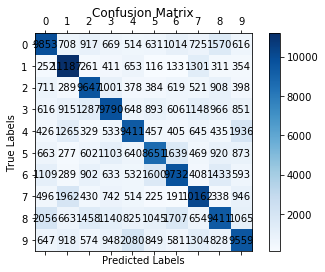

In [136]:
# Visualize confusion matrix using matplotlib
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar(cax)

# Add annotations
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, str(cm[i, j]), va='center', ha='center')

# Add labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(len(cm[0])))
plt.yticks(np.arange(len(cm)))

plt.show()

In [137]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(train_df['Label'], train_df['agreement'])

print(cross_tab)

agreement     0     1     2     3
Label                            
0          4513  4306  4278  4120
1          2854  3460  3941  4724
2          3376  3453  3879  4148
3          4653  4422  4489  4156
4          3896  3866  4060  4020
5          4199  3945  3717  3976
6          4467  4464  4132  4168
7          3573  3923  4258  4252
8          5515  5448  4961  4100
9          4954  4713  4285  4336


In [138]:
# Train set 
train_result_table = pd.pivot_table(train_df, values='Predicted Label', index='Label', columns='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(train_result_table)

agreement,0,1,2,3
Label,,,,
0,"(4.06, 4.0, 3.16)","(2.91, 1.0, 3.29)","(1.6, 0.0, 2.83)","(0.33, 0.0, 1.48)"
1,"(3.59, 3.0, 2.92)","(2.56, 1.0, 2.58)","(1.78, 1.0, 2.0)","(1.18, 1.0, 1.01)"
2,"(4.02, 3.0, 2.76)","(3.25, 2.0, 2.37)","(2.64, 2.0, 1.84)","(2.22, 2.0, 1.1)"
3,"(4.32, 4.0, 2.73)","(3.98, 3.0, 2.37)","(3.55, 3.0, 1.84)","(3.21, 3.0, 1.08)"
4,"(4.67, 4.0, 2.92)","(4.59, 4.0, 2.49)","(4.45, 4.0, 1.94)","(4.3, 4.0, 1.26)"
5,"(4.92, 5.0, 2.59)","(5.02, 5.0, 2.04)","(4.98, 5.0, 1.6)","(5.02, 5.0, 0.86)"
6,"(4.81, 5.0, 2.73)","(5.16, 6.0, 2.31)","(5.56, 6.0, 1.77)","(5.91, 6.0, 0.75)"
7,"(4.45, 4.0, 3.02)","(5.24, 7.0, 2.82)","(6.06, 7.0, 2.21)","(6.94, 7.0, 0.93)"
8,"(4.65, 5.0, 2.98)","(5.07, 6.0, 3.13)","(6.22, 8.0, 2.8)","(7.58, 8.0, 1.55)"


In [139]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(train_df, values='cost', index='Label', columns='agreement', aggfunc=calculate_cost)

# Print the result table
display(result_table)

agreement,0,1,2,3
Label,,,,
0,0.63,0.41,0.21,0.03
1,1.01,0.51,0.30,0.12
2,0.91,0.53,0.29,0.07
3,0.58,0.40,0.21,0.05
4,0.75,0.47,0.24,0.06
5,0.71,0.45,0.26,0.05
6,0.71,0.42,0.22,0.03
7,0.74,0.43,0.24,0.07
8,0.46,0.34,0.20,0.06


In [140]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(val_df['Label'], val_df['agreement'])

print(cross_tab)

agreement     0     1     2    3
Label                           
0           974   909   893  920
1           607   735   774  996
2           732   702   773  928
3          1050   934   962  920
4           789   819   817  920
5           880   836   940  696
6           914   938  1019  932
7           798   857   831  984
8          1208  1221  1049  848
9          1048  1049   942  856


In [141]:
# Create confusion matrix
cm = confusion_matrix(val_df['Label'], val_df['Predicted Label'])

# Display confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2161  127  187  147  103  160  215  166  305  125]
 [  57 2332   83   79  129   20   22  286   41   63]
 [ 124   53 2109  221   80   75  110  107  175   81]
 [ 122  181  289 2225  135  167  131  234  191  191]
 [  80  259   69   99 2087   93   91  159   85  323]
 [ 131   70  134  207  122 1949  340  113  138  148]
 [ 212   61  167  122  100  372 2298   71  291  109]
 [  84  425   96  166  106   47   49 2304   46  147]
 [ 392  118  295  262  170  246  387  156 2055  245]
 [ 129  198  139  216  424  195  113  292  149 2040]]


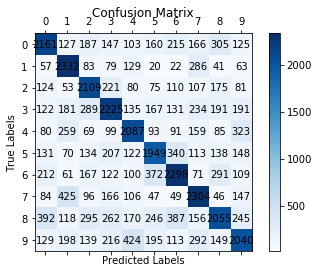

In [142]:
# Visualize confusion matrix using matplotlib
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar(cax)

# Add annotations
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, str(cm[i, j]), va='center', ha='center')

# Add labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(len(cm[0])))
plt.yticks(np.arange(len(cm)))

plt.show()

In [143]:
# Validation set 
val_result_table = pd.pivot_table(val_df, values='Predicted Label', index='Label', columns='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(val_result_table)

agreement,0,1,2,3
Label,,,,
0,"(4.06, 4.0, 3.11)","(2.83, 1.0, 3.25)","(1.6, 0.0, 2.82)","(0.22, 0.0, 1.27)"
1,"(3.54, 3.0, 2.87)","(2.53, 1.0, 2.59)","(1.69, 1.0, 1.88)","(1.07, 1.0, 0.38)"
2,"(3.99, 3.0, 2.72)","(3.09, 2.0, 2.25)","(2.62, 2.0, 1.78)","(2.21, 2.0, 1.03)"
3,"(4.34, 4.0, 2.71)","(3.88, 3.0, 2.31)","(3.51, 3.0, 1.75)","(3.19, 3.0, 1.01)"
4,"(4.73, 4.0, 2.88)","(4.5, 4.0, 2.38)","(4.37, 4.0, 1.91)","(4.1, 4.0, 0.63)"
5,"(4.64, 5.0, 2.52)","(5.01, 5.0, 2.04)","(5.03, 5.0, 1.36)","(4.97, 5.0, 0.23)"
6,"(4.89, 6.0, 2.65)","(5.26, 6.0, 2.23)","(5.63, 6.0, 1.56)","(5.88, 6.0, 0.78)"
7,"(4.44, 4.0, 2.89)","(5.11, 7.0, 2.81)","(6.23, 7.0, 2.04)","(6.89, 7.0, 0.8)"
8,"(4.77, 5.0, 2.97)","(5.24, 6.0, 3.04)","(6.42, 8.0, 2.65)","(7.75, 8.0, 1.1)"


In [144]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(val_df, values='cost', index='Label', columns='agreement', aggfunc=calculate_cost)

# Print the result table
display(result_table)

agreement,0,1,2,3
Label,,,,
0,0.61,0.39,0.22,0.01
1,0.99,0.50,0.29,0.16
2,0.89,0.47,0.25,0.07
3,0.57,0.36,0.18,0.04
4,0.76,0.48,0.24,0.04
5,0.78,0.45,0.22,0.01
6,0.64,0.40,0.19,0.04
7,0.74,0.41,0.19,0.04
8,0.44,0.33,0.20,0.04


In [145]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(test_df['Label'], test_df['agreement'])

print(cross_tab)

agreement     0     1     2     3
Label                            
0           981   931   891   828
1           606   680   845  1100
2           709   697   840   904
3          1030   984   843   904
4           782   815   794   856
5           880   773   894   716
6           936   983   930   856
7           784   820   908   992
8          1214  1266  1070   944
9          1078  1051   985   900


In [146]:
# Create confusion matrix
cm = confusion_matrix(test_df['Label'], test_df['Predicted Label'])

# Display confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1956  201  171  150  140  115  215  171  365  147]
 [  68 2378   44  147  135   18   27  235   86   93]
 [ 209  156 1616  293   93   72  152  158  275  126]
 [ 216  304  232 1783  148  190  125  291  270  202]
 [  98  344   66  132 1708   89   79  148  137  446]
 [ 145  108  113  303  158 1401  355  128  286  266]
 [ 297  108  150  150  152  347 1815   89  441  156]
 [ 117  560  100  185  143   59   47 1950  107  236]
 [ 561  219  260  279  216  219  397  153 1918  272]
 [ 165  262  116  230  503  166  128  273  207 1964]]


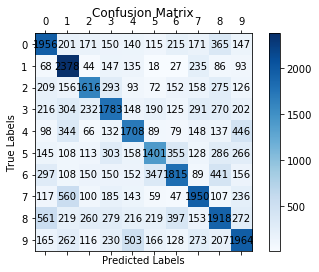

In [147]:
# Visualize confusion matrix using matplotlib
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar(cax)

# Add annotations
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, str(cm[i, j]), va='center', ha='center')

# Add labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(np.arange(len(cm[0])))
plt.yticks(np.arange(len(cm)))

plt.show()

In [148]:
# Test set 
test_result_table = pd.pivot_table(test_df, values='Predicted Label', index='Label', columns='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(test_result_table)

agreement,0,1,2,3
Label,,,,
0,"(3.94, 4.0, 3.12)","(2.83, 1.0, 3.34)","(1.84, 0.0, 3.01)","(0.86, 0.0, 2.3)"
1,"(3.34, 2.0, 2.92)","(2.67, 1.0, 2.7)","(1.81, 1.0, 1.94)","(1.36, 1.0, 1.43)"
2,"(4.03, 3.0, 2.83)","(3.64, 2.0, 2.72)","(2.88, 2.0, 2.18)","(2.8, 2.0, 2.07)"
3,"(4.21, 3.0, 2.86)","(3.98, 3.0, 2.5)","(3.83, 3.0, 2.28)","(3.26, 3.0, 1.51)"
4,"(4.56, 4.0, 2.98)","(4.68, 4.0, 2.63)","(4.6, 4.0, 2.29)","(4.36, 4.0, 1.67)"
5,"(4.84, 5.0, 2.63)","(5.01, 5.0, 2.33)","(5.24, 5.0, 1.84)","(5.27, 5.0, 1.68)"
6,"(4.79, 5.0, 2.78)","(5.16, 6.0, 2.49)","(5.45, 6.0, 2.08)","(5.86, 6.0, 1.38)"
7,"(4.18, 4.0, 3.1)","(5.01, 7.0, 2.9)","(5.8, 7.0, 2.41)","(6.5, 7.0, 1.79)"
8,"(4.53, 5.0, 3.04)","(5.17, 6.0, 3.14)","(6.0, 8.0, 2.96)","(6.68, 8.0, 2.66)"


In [149]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(test_df, values='cost', index='Label', columns='agreement', aggfunc=calculate_cost)

# Print the result table
display(result_table)

agreement,0,1,2,3
Label,,,,
0,0.68,0.40,0.25,0.11
1,1.03,0.57,0.29,0.16
2,1.08,0.81,0.45,0.45
3,0.62,0.44,0.32,0.14
4,0.75,0.48,0.34,0.18
5,0.84,0.57,0.36,0.26
6,0.79,0.46,0.33,0.22
7,0.76,0.48,0.32,0.20
8,0.50,0.36,0.23,0.19


In [150]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(stacked_df['Label'], stacked_df['agreement'])

print(cross_tab)

agreement     0     1     2     3
Label                            
0          6468  6146  6062  5868
1          4067  4875  5560  6820
2          4817  4852  5492  5980
3          6733  6340  6294  5980
4          5467  5500  5671  5796
5          5959  5554  5551  5388
6          6317  6385  6081  5956
7          5155  5600  5997  6228
8          7937  7935  7080  5892
9          7080  6813  6212  6092


In [151]:
# Train set 
all_result_table = pd.pivot_table(stacked_df, values='Predicted Label', index='Label', columns='agreement', aggfunc=calculate_mean_std)

# Print the result table
display(all_result_table)

agreement,0,1,2,3
Label,,,,
0,"(4.04, 4.0, 3.14)","(2.88, 1.0, 3.29)","(1.64, 0.0, 2.86)","(0.39, 0.0, 1.6)"
1,"(3.54, 3.0, 2.91)","(2.57, 1.0, 2.6)","(1.77, 1.0, 1.97)","(1.2, 1.0, 1.03)"
2,"(4.02, 3.0, 2.77)","(3.28, 2.0, 2.41)","(2.67, 2.0, 1.89)","(2.3, 2.0, 1.3)"
3,"(4.31, 4.0, 2.75)","(3.96, 3.0, 2.38)","(3.58, 3.0, 1.89)","(3.21, 3.0, 1.14)"
4,"(4.66, 4.0, 2.93)","(4.59, 4.0, 2.5)","(4.46, 4.0, 1.99)","(4.28, 4.0, 1.26)"
5,"(4.87, 5.0, 2.59)","(5.02, 5.0, 2.08)","(5.03, 5.0, 1.61)","(5.05, 5.0, 0.97)"
6,"(4.82, 5.0, 2.73)","(5.18, 6.0, 2.32)","(5.56, 6.0, 1.79)","(5.9, 6.0, 0.87)"
7,"(4.41, 4.0, 3.01)","(5.19, 7.0, 2.83)","(6.04, 7.0, 2.22)","(6.86, 7.0, 1.11)"
8,"(4.65, 5.0, 2.99)","(5.11, 6.0, 3.12)","(6.21, 8.0, 2.81)","(7.46, 8.0, 1.76)"


In [152]:
# Use pd.pivot_table to calculate the mean and std
result_table = pd.pivot_table(stacked_df, values='cost', index='Label', columns='agreement', aggfunc=calculate_cost)

# Print the result table
display(result_table)

agreement,0,1,2,3
Label,,,,
0,0.64,0.40,0.22,0.03
1,1.01,0.52,0.30,0.13
2,0.93,0.56,0.31,0.13
3,0.58,0.40,0.22,0.06
4,0.75,0.47,0.25,0.08
5,0.74,0.47,0.27,0.07
6,0.71,0.42,0.23,0.06
7,0.74,0.43,0.24,0.08
8,0.47,0.34,0.21,0.08


In [153]:
display(stacked_df)

,image_id,flattened_image,Label,agreement,instance_id,Predicted Label,probability,residuals,cost
0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,3,1,3,"[0.13484440743923187, 4.8284931835951284e-05, ...",0,0.00
1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,3,2,7,"[0.005900799296796322, 9.56211588345468e-05, 0...",0,0.00
2,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,4,9,"[0.11021239310503006, 0.012658515013754368, 0....",0,0.00
3,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,3,5,6,"[0.0457124337553978, 0.08082355558872223, 0.18...",0,0.00
4,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,3,6,4,"[0.0019256320083513856, 0.003321697935461998, ...",0,0.00
...,...,...,...,...,...,...,...,...,...
239995,59954,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,239954,9,"[0.08974456787109375, 0.08305518329143524, 0.0...",-8,1.50
239996,59957,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,239957,9,"[0.022544946521520615, 0.0013411244144663215, ...",-3,0.75
239997,59976,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,239976,9,"[0.053023744374513626, 0.08848884701728821, 0....",-3,0.75
239998,59991,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,239991,2,"[0.0008688367670401931, 2.8404554086591816e-07...",-2,0.75


In [154]:
# The predicted probabilities
probs = np.array(test_df['probability'])

# Parse each string and convert to a list of floats
probabilities_lists = []
for prob_str in probs:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists.append(prob_list)

# Convert the list of lists to a numpy array
probs = np.array(probabilities_lists)

# Now you can access individual probabilities
print(probs)

[[3.68917674e-01 3.84632871e-02 9.09798518e-02 ... 3.79457884e-02
  8.15377533e-02 5.82448952e-02]
 [2.39665229e-02 1.55271506e-02 1.68101043e-02 ... 4.28656414e-02
  2.61227012e-01 3.27591062e-01]
 [6.90205619e-02 6.03638227e-07 3.09317233e-03 ... 4.83576987e-05
  1.47435829e-01 2.17290968e-02]
 ...
 [5.30237444e-02 8.84888470e-02 4.61399369e-02 ... 1.21648274e-01
  2.02253163e-02 5.43695271e-01]
 [8.68836767e-04 2.84045541e-07 9.23387408e-01 ... 3.52849179e-06
  3.32987346e-02 3.37086880e-04]
 [6.43189028e-02 4.03702587e-01 8.99559353e-03 ... 1.76550314e-01
  2.80721169e-02 4.73065749e-02]]


In [155]:
test_df['probs'] = probabilities_lists

In [156]:
test_df

,image_id,flattened_image,Label,agreement,instance_id,Predicted Label,probability,residuals,cost,probs
0,10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,3,10,0,"[0.36891767382621765, 0.0384632870554924, 0.09...",0,0.00,"[0.36891767382621765, 0.0384632870554924, 0.09..."
1,11,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,3,11,9,"[0.02396652288734913, 0.015527150593698025, 0....",0,0.00,"[0.02396652288734913, 0.015527150593698025, 0...."
2,24,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,3,24,6,"[0.06902056187391281, 6.036382274032803e-07, 0...",0,0.00,"[0.06902056187391281, 6.036382274032803e-07, 0..."
3,32,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,3,32,1,"[0.05709286034107208, 0.4485521912574768, 0.03...",0,0.00,"[0.05709286034107208, 0.4485521912574768, 0.03..."
4,34,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,3,34,6,"[0.04676184058189392, 0.0023709209635853767, 0...",0,0.00,"[0.04676184058189392, 0.0023709209635853767, 0..."
...,...,...,...,...,...,...,...,...,...,...
35995,59954,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,239954,9,"[0.08974456787109375, 0.08305518329143524, 0.0...",-8,1.50,"[0.08974456787109375, 0.08305518329143524, 0.0..."
35996,59957,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,239957,9,"[0.022544946521520615, 0.0013411244144663215, ...",-3,0.75,"[0.022544946521520615, 0.0013411244144663215, ..."
35997,59976,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,0,239976,9,"[0.053023744374513626, 0.08848884701728821, 0....",-3,0.75,"[0.053023744374513626, 0.08848884701728821, 0...."
35998,59991,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,239991,2,"[0.0008688367670401931, 2.8404554086591816e-07...",-2,0.75,"[0.0008688367670401931, 2.8404554086591816e-07..."


In [157]:
# Number of classes
n_classes = 10

full = test_df[test_df['agreement']==3]
high = test_df[test_df['agreement']==2]
low = test_df[test_df['agreement']==1]
no = test_df[test_df['agreement']==0]
print(len(full))
print(len(high))
print(len(low))
print(len(no))

9000
9000
9000
9000


In [158]:
# Example true labels
true_labels = np.array(full['Label'])

# Example predicted probabilities
probs = np.array(full['probability'])

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.arange(n_classes))
#print(true_labels_bin)
#true_labels_bin[:, 0]

In [159]:
# The predicted probabilities
#probs = np.array(test_df['probability'])

# Parse each string and convert to a list of floats
probabilities_lists = []
for prob_str in probs:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists.append(prob_list)

# Convert the list of lists to a numpy array
probs = np.array(probabilities_lists)

# Now you can access individual probabilities
#print(probs)

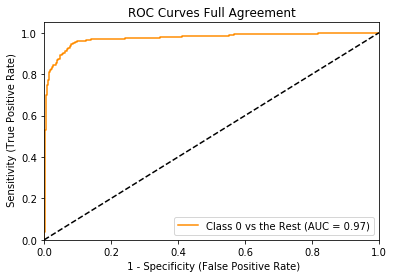

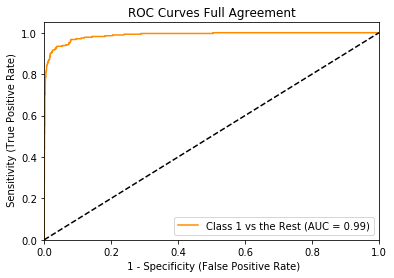

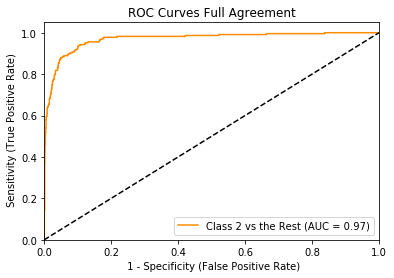

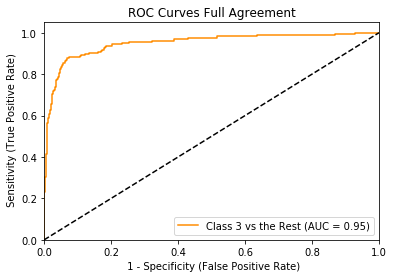

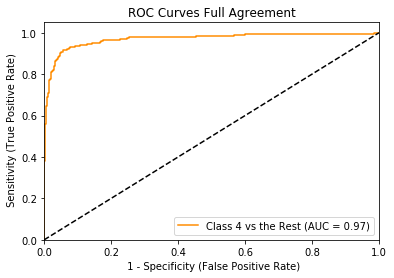

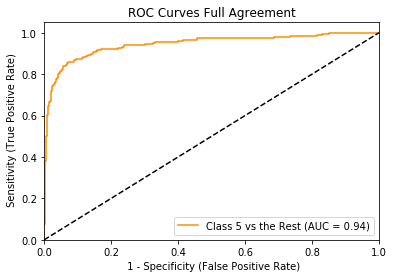

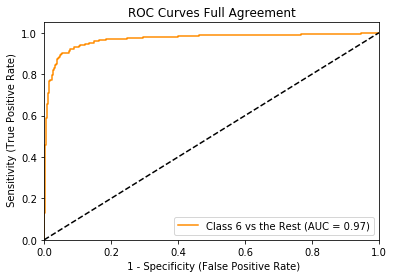

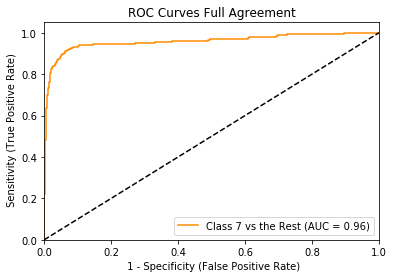

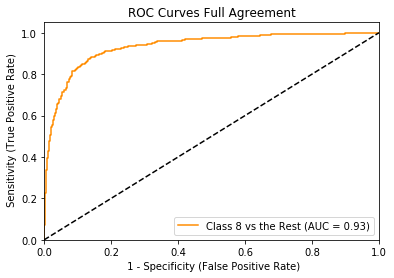

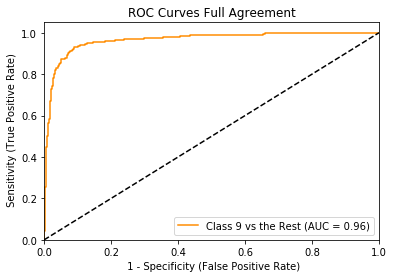

In [160]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
#plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color='darkorange', label=f'Class {i} vs the Rest (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(' 1 - Specificity (False Positive Rate)')
    plt.ylabel(' Sensitivity (True Positive Rate)')
    plt.title('ROC Curves Full Agreement')
    plt.legend(loc="lower right")
    plt.show()

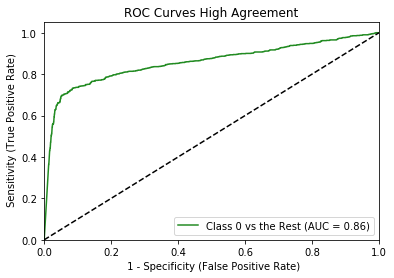

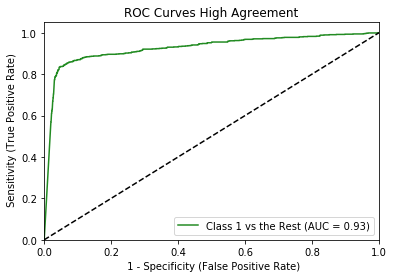

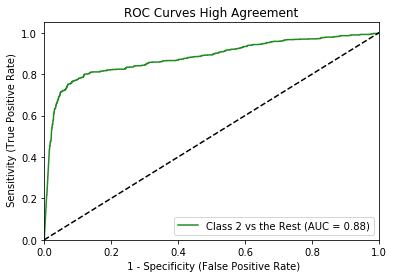

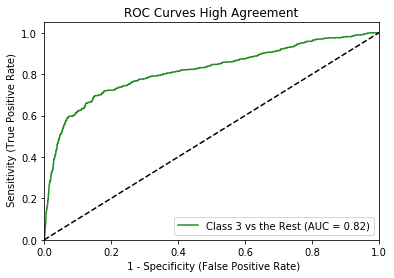

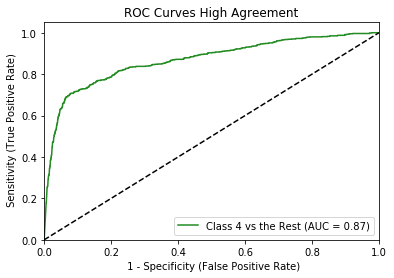

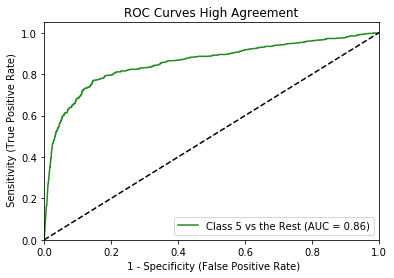

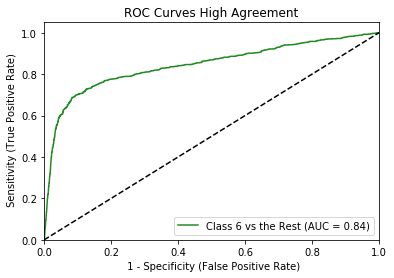

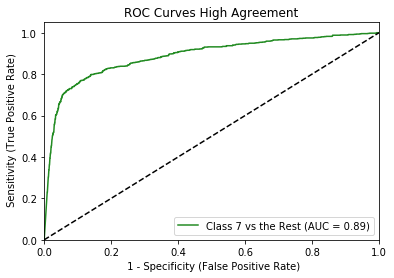

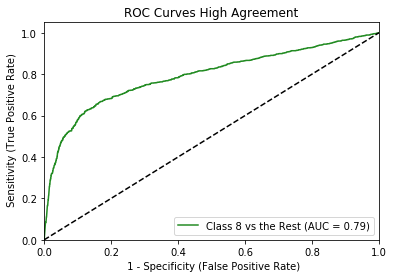

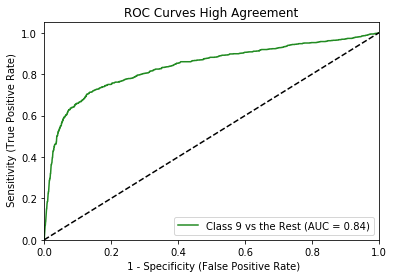

In [161]:
# The true labels
true_labels = np.array(high['Label'])

# The predicted probabilities
probs = np.array(high['probability'])

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.arange(n_classes))
true_labels_bin[:, 0]

# Parse each string and convert to a list of floats
probabilities_lists = []
for prob_str in probs:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists.append(prob_list)

# Convert the list of lists to a numpy array
probs = np.array(probabilities_lists)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
#plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color= 'forestgreen', label=f'Class {i} vs the Rest (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(' 1 - Specificity (False Positive Rate)')
    plt.ylabel(' Sensitivity (True Positive Rate)')
    plt.title('ROC Curves High Agreement')
    plt.legend(loc="lower right")
    plt.show()

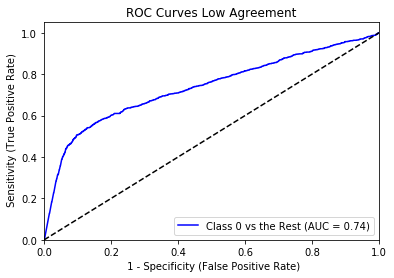

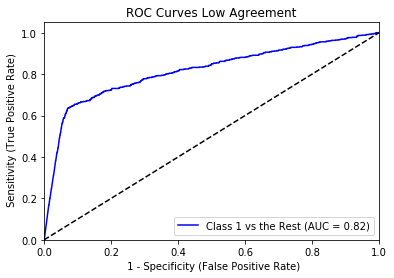

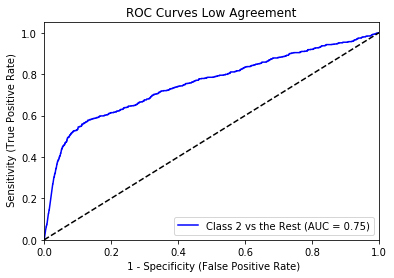

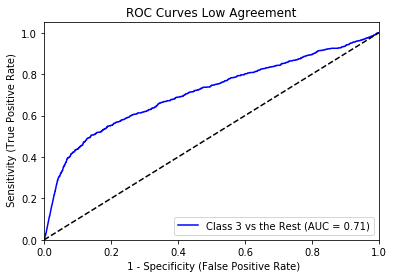

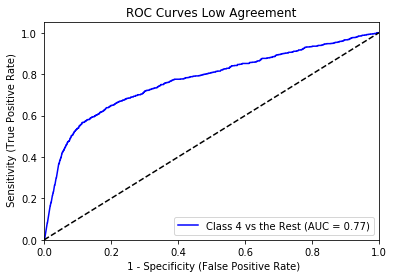

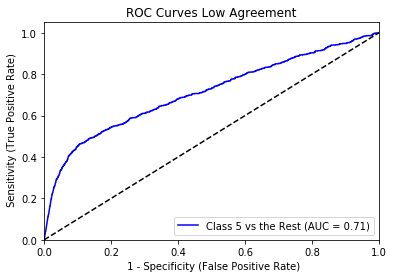

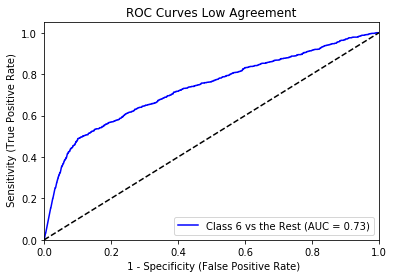

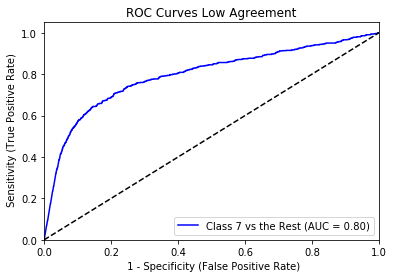

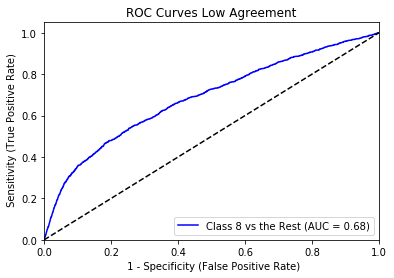

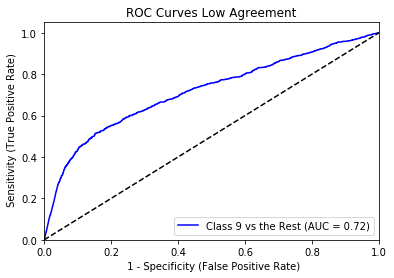

In [162]:
# The true labels
true_labels = np.array(low['Label'])

# The predicted probabilities
probs = np.array(low['probability'])

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.arange(n_classes))
#print(true_labels_bin)
true_labels_bin[:, 0]

# Parse each string and convert to a list of floats
probabilities_lists = []
for prob_str in probs:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists.append(prob_list)

# Convert the list of lists to a numpy array
probs = np.array(probabilities_lists)

# Now you can access individual probabilities
#print(probs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
#plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color='blue' , label=f'Class {i} vs the Rest (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(' 1 - Specificity (False Positive Rate)')
    plt.ylabel(' Sensitivity (True Positive Rate)')
    plt.title('ROC Curves Low Agreement')
    plt.legend(loc="lower right")
    plt.show()

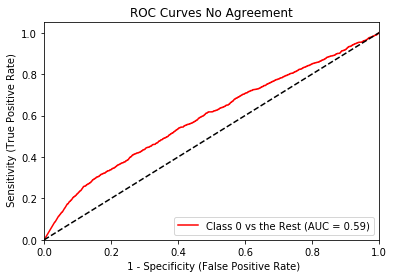

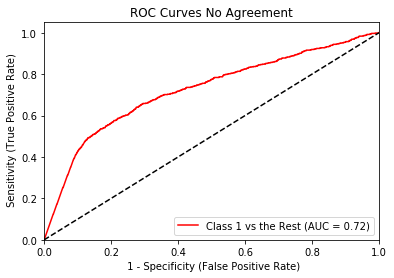

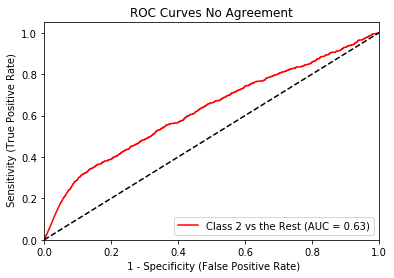

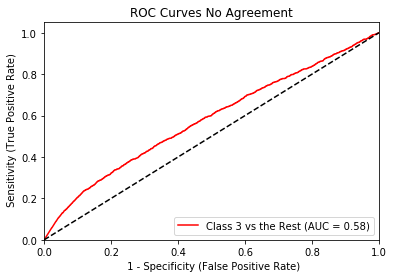

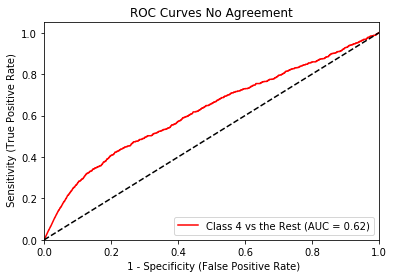

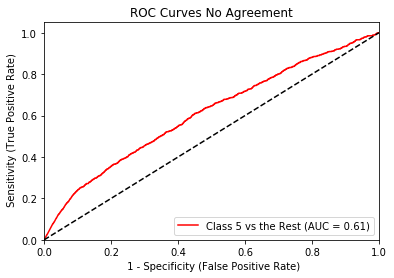

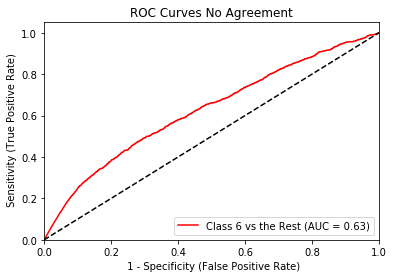

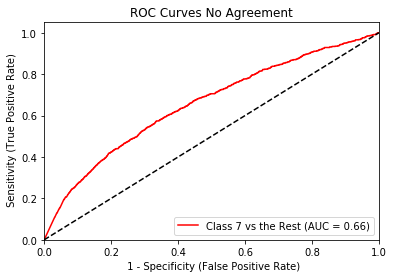

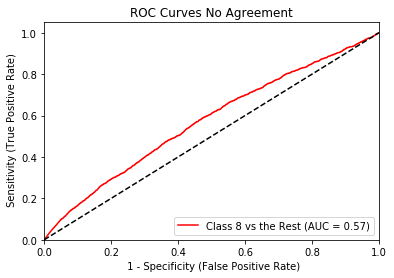

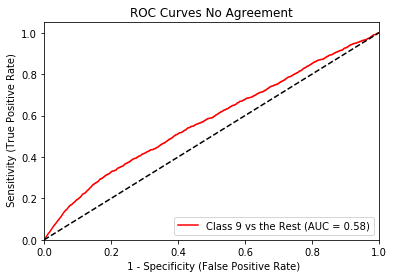

In [163]:
# The true labels
true_labels = np.array(no['Label'])

# The predicted probabilities
probs = np.array(no['probability'])

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.arange(n_classes))
#print(true_labels_bin)
true_labels_bin[:, 0]

# Parse each string and convert to a list of floats
probabilities_lists = []
for prob_str in probs:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists.append(prob_list)

# Convert the list of lists to a numpy array
probs = np.array(probabilities_lists)

# Now you can access individual probabilities
#print(probs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
#plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color='red', label=f'Class {i} vs the Rest (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(' 1 - Specificity (False Positive Rate)')
    plt.ylabel(' Sensitivity (True Positive Rate)')
    plt.title('ROC Curves No Agreement')
    plt.legend(loc="lower right")
    plt.show()

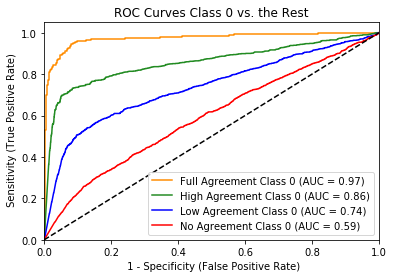

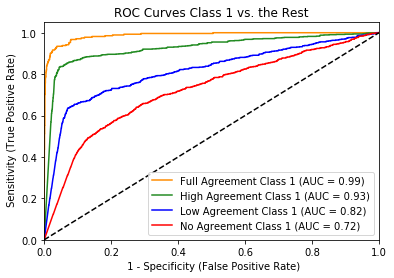

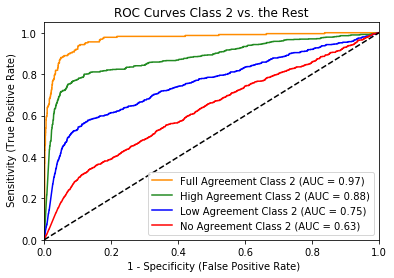

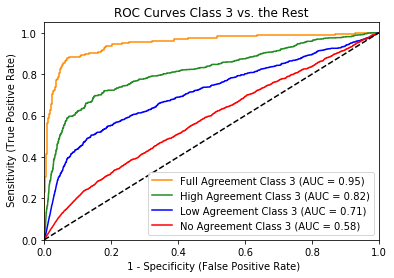

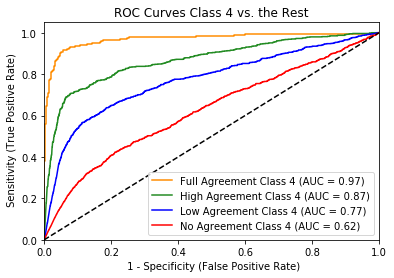

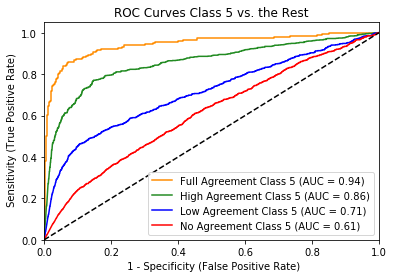

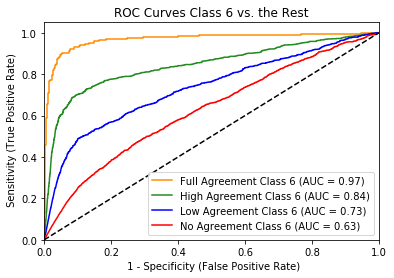

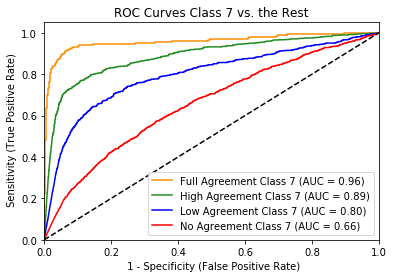

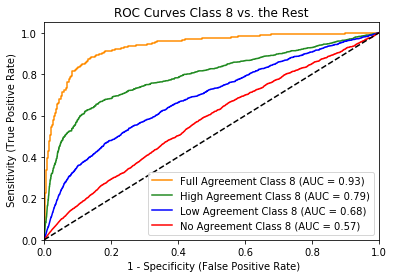

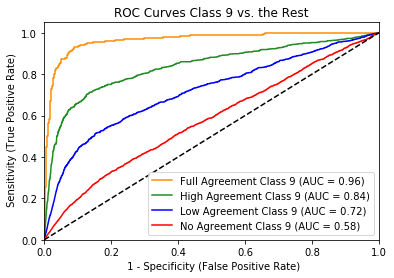

In [164]:
# The true labels
true_labels_full = np.array(full['Label'])

# The predicted probabilities
probs_full = np.array(full['probability'])

# Binarize the true labels
true_labels_bin_full = label_binarize(true_labels_full, classes=np.arange(n_classes))
true_labels_bin_full[:, 0]

# Parse each string and convert to a list of floats
probabilities_lists_full = []
for prob_str in probs_full:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists_full.append(prob_list)

# Convert the list of lists to a numpy array
probs_full = np.array(probabilities_lists_full)

# Compute ROC curve and ROC area for each class
fpr_full = dict()
tpr_full = dict()
roc_auc_full = dict()
for i in range(n_classes):
    fpr_full[i], tpr_full[i], _ = roc_curve(true_labels_bin_full[:, i], probs_full[:, i])
    roc_auc_full[i] = auc(fpr_full[i], tpr_full[i])

#######################################################################################################

# The true labels
true_labels_high = np.array(high['Label'])

# The predicted probabilities
probs_high = np.array(high['probability'])

# Binarize the true labels
true_labels_bin_high = label_binarize(true_labels_high, classes=np.arange(n_classes))
true_labels_bin_high[:, 0]

# Parse each string and convert to a list of floats
probabilities_lists_high = []
for prob_str in probs_high:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists_high.append(prob_list)

# Convert the list of lists to a numpy array
probs_high = np.array(probabilities_lists_high)

# Compute ROC curve and ROC area for each class
fpr_high = dict()
tpr_high = dict()
roc_auc_high = dict()
for i in range(n_classes):
    fpr_high[i], tpr_high[i], _ = roc_curve(true_labels_bin_high[:, i], probs_high[:, i])
    roc_auc_high[i] = auc(fpr_high[i], tpr_high[i])

#######################################################################################################

# The true labels
true_labels_low = np.array(low['Label'])

# The predicted probabilities
probs_low = np.array(low['probability'])

# Binarize the true labels
true_labels_bin_low = label_binarize(true_labels_low, classes=np.arange(n_classes))
#print(true_labels_bin)
true_labels_bin_low[:, 0]

# Parse each string and convert to a list of floats
probabilities_lists_low = []
for prob_str in probs_low:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists_low.append(prob_list)

# Convert the list of lists to a numpy array
probs_low = np.array(probabilities_lists_low)

# Now you can access individual probabilities
#print(probs)

# Compute ROC curve and ROC area for each class
fpr_low = dict()
tpr_low = dict()
roc_auc_low = dict()
for i in range(n_classes):
    fpr_low[i], tpr_low[i], _ = roc_curve(true_labels_bin_low[:, i], probs_low[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])

################################################################################################

# The true labels
true_labels_no = np.array(no['Label'])

# The predicted probabilities
probs_no = np.array(no['probability'])

# Binarize the true labels
true_labels_bin_no = label_binarize(true_labels_no, classes=np.arange(n_classes))
#print(true_labels_bin)
true_labels_bin_no[:, 0]

# Parse each string and convert to a list of floats
probabilities_lists_no = []
for prob_str in probs_no:
    # Remove '[' and ']' and split the string to get individual probability strings
    prob_str = prob_str.strip('[]')
    prob_list = [float(prob) for prob in prob_str.split(', ')]
    probabilities_lists_no.append(prob_list)

# Convert the list of lists to a numpy array
probs_no1 = np.array(probabilities_lists_no)

# Now you can access individual probabilities
#print(probs)

# Compute ROC curve and ROC area for each class
fpr_no = dict()
tpr_no = dict()
roc_auc_no = dict()
for i in range(n_classes):
    fpr_no[i], tpr_no[i], _ = roc_curve(true_labels_bin_no[:, i], probs_no1[:, i])
    roc_auc_no[i] = auc(fpr_no[i], tpr_no[i])

################################################################################################
    
# Plot ROC curves
#plt.figure(figsize=(8, 6))
for i in range(n_classes):
    
    plt.plot(fpr_full[i], tpr_full[i], color='darkorange', label=f'Full Agreement Class {i} (AUC = {roc_auc_full[i]:.2f})')
    plt.plot(fpr_high[i], tpr_high[i], color= 'forestgreen', label=f'High Agreement Class {i} (AUC = {roc_auc_high[i]:.2f})')
    plt.plot(fpr_low[i], tpr_low[i], color='blue', label=f'Low Agreement Class {i} (AUC = {roc_auc_low[i]:.2f})')
    plt.plot(fpr_no[i], tpr_no[i], color='red', label=f'No Agreement Class {i} (AUC = {roc_auc_no[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel(' 1 - Specificity (False Positive Rate)')
    plt.ylabel(' Sensitivity (True Positive Rate)')
    plt.title(f'ROC Curves Class {i} vs. the Rest')
    plt.legend(loc="lower right")
    plt.show()

In [165]:
import math

probabilities_lists = {
    0: [0, 0.03, 0.08, 0.08, 0.05, 0.08, 0.16, 0.06, 0.38, 0.08],
    1: [0.09, 0, 0.03, 0.12, 0.17, 0.03, 0.03, 0.34, 0.07, 0.12],
    2: [0.14, 0.02, 0, 0.2, 0.04, 0.08, 0.14, 0.05, 0.25, 0.08],
    3: [0.09, 0.05, 0.14, 0, 0.07, 0.14, 0.09, 0.1, 0.18, 0.14],
    4: [0.07, 0.09, 0.04, 0.09, 0, 0.09, 0.07, 0.06, 0.12, 0.37],
    5: [0.09, 0.01, 0.05, 0.13, 0.07, 0, 0.33, 0.03, 0.16, 0.13],
    6: [0.132908028,0.009037746,0.070707071,0.070707071,0.039872408,
        0.265816055,0,0.021265284,0.318979266,0.070707071],
    7: [0.11, 0.21, 0.06, 0.17, 0.08, 0.06, 0.05, 0, 0.09, 0.17],
    8: [0.25, 0.02, 0.1, 0.1, 0.05, 0.1, 0.25, 0.03, 0, 0.1],
    9: [0.08, 0.04, 0.05, 0.12, 0.26, 0.12, 0.08, 0.09, 0.16, 0],
    10: [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
    11: [1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9]
}

def calculate_entropy(probabilities):
    entropy = 0
    for p in probabilities:
        if p != 0:
            entropy -= p * math.log(p)
    return entropy

for key, probabilities in probabilities_lists.items():
    entropy = calculate_entropy(probabilities)
    print(f"Entropy for probabilities list {key}: {round(entropy,2)}")


Entropy for probabilities list 0: 1.89
Entropy for probabilities list 1: 1.9
Entropy for probabilities list 2: 1.98
Entropy for probabilities list 3: 2.13
Entropy for probabilities list 4: 1.94
Entropy for probabilities list 5: 1.89
Entropy for probabilities list 6: 1.8
Entropy for probabilities list 7: 2.08
Entropy for probabilities list 8: 1.95
Entropy for probabilities list 9: 2.05
Entropy for probabilities list 10: 0.41
Entropy for probabilities list 11: 2.2


In [166]:
from scipy.stats import pearsonr
full = [0.97, 0.99, 0.97, 0.95, 0.97, 0.94, 0.97, 0.96, 0.93, 0.96]
high = [0.86, 0.93, 0.88, 0.82, 0.87, 0.86, 0.84, 0.89, 0.79, 0.84]
low = [0.74, 0.82, 0.75, 0.71, 0.77, 0.71, 0.73, 0.80, 0.68, 0.72]
no = [0.59, 0.72, 0.63, 0.58, 0.62, 0.61, 0.63, 0.66, 0.57, 0.58]
Entropy = [1.89, 1.9, 1.98, 2.13, 1.94, 1.89, 1.8, 2.08, 1.95, 2.05]

corr1, _ = pearsonr(full, Entropy)
print('Pearsons correlation between Entropy and Full Agreement: %.3f' % corr1)
corr2, _ = pearsonr(high, Entropy)
print('Pearsons correlation between Entropy and High Agreement: %.3f' % corr2)
corr3, _ = pearsonr(low, Entropy)
print('Pearsons correlation between Entropy and Low Agreement: %.3f' % corr3)
corr4, _ = pearsonr(no, Entropy)
print('Pearsons correlation between Entropy and No Agreement: %.3f' % corr4)

Pearsons correlation between Entropy and Full Agreement: -0.262
Pearsons correlation between Entropy and High Agreement: -0.144
Pearsons correlation between Entropy and Low Agreement: -0.016
Pearsons correlation between Entropy and No Agreement: -0.236


In [167]:
confidence_score(probabilities_lists_full)

3610.2669690234293
9000
Sum of differences between max and second max probabilities: 0.4011407743359366


In [168]:
confidence_score(probabilities_lists_high)

3622.6270936735327
9000
Sum of differences between max and second max probabilities: 0.4025141215192814


In [169]:
confidence_score(probabilities_lists_low)

3591.3122732431916
9000
Sum of differences between max and second max probabilities: 0.39903469702702127


In [170]:
confidence_score(probabilities_lists_no)

3494.4680018031277
9000
Sum of differences between max and second max probabilities: 0.38827422242256976
